# New yorkers yellow taxi-rides tipping behaviours in holidays of 2021

In [4]:
from utils import get_taxi_data
import pandas as pd
import numpy as np
import holidays as h  #
from datetime import date,datetime,timedelta
import seaborn as sns
import matplotlib.pyplot as plt

In this project we analyse a set of questions related to new-yorkers tipping behaviours in 2021 using the yellow taxi across some public holidays, we aim to answer <br />

1.Passangers tipping behaviours across holidays<br />
2.Passangers tipping behaviours across boroughs<br />



In [5]:
def get_data(year,month,veichle_type,Full_year=False):
    '''
    Downloads ride data from TLC for a given month,
    and returns it as a pandas DataFrame.

        Parameters:
            year (str): the year of the data we want (2009-2022)
            month (str): the month of the data we want (01-12)
            veichle_type (str): the type of vehicles we're interested in,
            which is yellow
            Full_year (bool): whether to import the whole data or not. (default: False)


        Returns:
            data (Panda Dataframe): Data as panda dataframe
    '''

    
    columns_to_download=[]
    columns_to_download=["tpep_pickup_datetime","tpep_dropoff_datetime","PULocationID","DOLocationID","trip_distance","payment_type","fare_amount","extra","mta_tax","improvement_surcharge","tip_amount","tolls_amount","total_amount","congestion_surcharge","airport_fee"]


    if Full_year:
        #Extract Data for whole year
        months=["%.2d" % i for i in range(1,13)]
        data=pd.DataFrame({})
        ##Extracting all year data works an takes roughly 11min and 25 seconds
        for i in months:
            temp=get_taxi_data(year,i,veichle_type)
            temp["trip_duration"]=((temp.loc[:,"tpep_dropoff_datetime"]-temp.loc[:,"tpep_dropoff_datetime"]).dt.total_seconds())/60.0
            data=pd.concat([data,temp],ignore_index=True)
        return data

    else:
        m=month
        data=get_taxi_data(year,m,veichle_type,columns=columns_to_download)
        data["trip_duration"]=((data.iloc[:,1]-data.iloc[:,0]).dt.total_seconds())/60.0
        return data

## Data Infromation and Availbiltiy statement 

 The data used in the attached datasets were collected and provided by the NYC Taxi and Limousine Commission (TLC), we imported two datasets from their public websites which are the 
<br />
 *  Yellow taxi records in 2021<br />
 *  Taxi zones location records 
<br />

 Due to limited availbility of running machine time we constraint ourselves to the data of January, November and December. Prior infromation is known which is that those month's contain the follwoing holidays which are New-Years on the 1st and Martin Luther King Jr. on the 19th of January, Thanksgiving on the 25th the and veterns day on the 11th of November and Christmas on 25th of December.<br />

 The taxi records were subsetted to include the following features 

 * Pick up data and time (datetime64ns) object<br />
 * Drop off data and time (datetime64ns) object<br />
 * Pick up location ID (Integer) number<br />
 * Drop off location ID (Integer) number<br />
 * Trip Distance Elapsed trip distance in miles reported by taximeter (Float64) number<br />
 * Payment type A numeric code signifying how passanger paid (Integer) number<br />
 * Total Amount total amount charged to passanger, without cash tips (Float64) number<br />
 * Fare amount time and distance fare calcaulted by meter (Float64) number<br />
 * Tip Amount the graniularity paid to the taxi driver by credit card (Float64) number<br />
 * Extra Miscellaneous extras and surcharges. Currently, this only includes the rush hour and overnight charges (Float64) number<br />
 * MTA Tax tax that is automatically triggered based on the metered rate in use (Float64) number<br />
 * Improvemnt Surchrage for assessed trips (Float64) number<br />
 * Congestion Surcharge charge for trips that pass trhough manhattan south 96th street (Float64) number<br />
 * Tolls amount tolls paid in trip (Float64) number<br />
 * Airport Fee a baseline fee for trips to the airport (Float64) number<br />



 The zones records include the following features 

 * Location ID (Integer) number<br />
 * Borough a city (String) object <br />
 * Zone a district (String) object <br />
 * Service Zone taxi service zone (String) object <br />


## Explantory Data Analysis 

EDA is an essential part to gain insights to clean raw data this section discusses the metadata , descriptive statistics and ambiguities in the raw data . For intial discussion purpose we consider data collected in January of 2021. 

In [6]:
def EDA(data):
    '''
    This function prints the metadata, descrivptive statstics, 
    classes of values for discrete data types
    Missing values,Negative values and zero values. 

        Parameters:
            Data (Panda Dataframe): Data frameb object 


        Returns:
            None
    '''
    
    #MetaData Analysis
    print(data.info())
    
    #Descriptive Statsitcs
    print(data.describe())

    #Values of discrete or continious attributes with less than 10 values
    for column in data.iloc[:,[5,8,9,13,14]]:
        print(data[column].value_counts())

    #Missing,Ambiguities Unrealistic values ,Wrong GPS coordinates, Long distance rides to the other major cities disguised as taxi rides
    
    ## Missing
    ## We are creating a dataframe that specifies the precentage of a missing value in a column
    ## percentage of missing value for each column is calcualoted and then put in 
    ## a data frame 
    percent_missing = data.isnull().sum() * 100 / len(data)
    missing_value_df = pd.DataFrame({'column_name': data.columns,
                                 'percent_missing': percent_missing})
    missing_value_df.sort_values('percent_missing', inplace=True)
    print(missing_value_df)
    

    ## Negative values
    ## We are creating a dataframe that specifies the precentage of negative value in a column
    ## percentage of negative value for each column is calcualoted and then put in 
    ## a data frame 
    percent_negative = data.iloc[:,2:].lt(0).sum() * 100 / len(data)
    negative_value_df = pd.DataFrame({'column_name': data.iloc[:,2:].columns,
                                 'percent_negative': percent_negative})
    negative_value_df.sort_values('percent_negative', inplace=True)
    print(negative_value_df)

    ##Zero values
    ## We are creating a dataframe that specifies the precentage of zero value in a column
    ## percentage of zero value for each column is calcualoted and then put in 
    ## a data frame 
    percent_zero = data.iloc[:,2:].eq(0).sum() * 100 / len(data)
    zero_value_df = pd.DataFrame({'column_name': data.iloc[:,2:].columns,
                                 'percent_zero': percent_zero})
    zero_value_df.sort_values('percent_zero', inplace=True)
    print(zero_value_df)

    ##Same value pickup and drop off time, e.g. "Trip duration = 0"
    ## Seeing how many precent of the taxi record data have zero duration 
    percent_trip_duration_zero = data.iloc[:,15].eq(0).sum() * 100 / len(data)
    percent_trip_duration_zero_df = pd.DataFrame({'column_name': data.iloc[:,[15]].columns,
                                 'percent_trip_duration_zero': percent_trip_duration_zero})                          
    percent_trip_duration_zero_df.sort_values('percent_trip_duration_zero',ascending=False, inplace=True)
    print(percent_trip_duration_zero_df)
    

In [7]:
#Placeholder to show results 
data=get_data("2021","01","yellow")

#To run EDA please uncomment the following 
'''
for i in ["01","11","12"]:
        data=get_data("2021",i,"yellow")
        EDA(data)

'''

'\nfor i in ["01","11","12"]:\n        data=get_data("2021",i,"yellow")\n        EDA(data)\n\n'

Based on the EDA results we conclude the follwoing: 

* Missing Values e.g."Nan" <br />

    1.Congestion surcharge <br />
    2.Airport fee  <br />

* Negative Values<br />

    1.Tip amount <br />
    2.Tolls amount <br />
    3.Extra  <br />
    4.Congestion surcharge <br />
    5.Improvement surcharge<br />
    6.MTA Tax  <br />
    7.Total amount <br />
    8.Fare amount <br />

* Zero Values<br />

    1.Trip Duration  <br />
    2.Trip Distance  <br />
    3.Total amount <br />
    4.Fare amount <br />
    5.Improvement surcharge <br />
    6.Congestion surcharge<br />
    7.airport_fee   <br />
    8.payment_type   <br />
    9.MTA Tax  <br />
    10.Tip amount   <br />
    11.Extra  <br />
    12.Tolls amount <br />


* Ambiguities<br />

    1.Trip Distance has values of zero as minimum and maximum value of 263163 miles whcih means that the taxi travelled out of the USA , its ambigious that a trip has a minimum value of zero and a  maximum value that is farther than the distance from east to west coast of USA <br />
    2.Payment types are 0,1,2,3,4 but zero is not lsited in the metadata dictionary of NYC taxi trip data <br />
    3.Fare amount has negative values and the maximum is about 6000 dollars <br />
    4.Tip amount has a tip of about 1400 dollars<br />
    5.Pickup and drop off lcoation should be in [1,263] according to the taxi zones records data<br />
    6.Trip Distance should not be greater than 200 miles <br />
    7.Fare amount should not exceed $300<br />
    8.Trip Duration should be greater than a minute and less than three hours<br />
    9.Trips with zero distance but have a duration and a fare amount would remain the same<br />
    10.Trips with zero duration but have a distance and a fare amount would be removed <br />
    11.Trips with zero distance and duration but have specific fare amount values  means that either the payment type was zero in which we will remove them or the drop off location code is 264/265 which doesnt exist in NYC <br />
    12. Trips with zero duration and distance and fare amount will be removed <br />

These are the considerations to take when cleaning the data.

In [8]:

def clean_data(data):
    
    #Missing values 
    ##Fill NA with zero 
    data=data.fillna(0)

    #Removal of data
    ##Exlcude data with paymemet type being 0,3,4,5 
    data=data[(data['payment_type'] == 1) | (data['payment_type'] == 2)]


    ##Exclude data with location IDs not between [1,263]
    data=data[(data["PULocationID"]>=1) & (data["PULocationID"]<=263)]
    data=data[(data["DOLocationID"]>=1) & (data["DOLocationID"]<=263)]


    #Consistency of data
    ## Trip distance should greater than 0 miles but less than 200 miles.
    data=data[(data["trip_distance"]>0) & (data["trip_distance"]<=200)]
    ## Fare amount should be at least $2.5 but at most $250.
    data=data[(data["fare_amount"]>2.5) & (data["fare_amount"]<=250)]
    ## Tip are less than $100
    data=data[ (data["tip_amount"]<=100)]
    ## Trip duration should be  less than three hours.
    data = data[(data['trip_duration'] > 0) & (data["trip_duration"]<= 180)]         

    return(data) 



## Cleaning Data <br />
Its important to keep in mind TLC Regulations, According to TLC regulations the maximum allowed trip duration in a 24 hour interval is 12 hours.

1. Focus on payment types by cash and credit card <br />
2. Pick Up and Drop Off Location ID belonging to NYC taxi zone map <br />
3. Removing percentiles as outliers for each column would diminish the variablity in data so we decided to subset trips with distances between [0,200] miles, with  fare amount being less than 250 dollars and trips being at least a minute and at most 3 hours  

In [9]:
c_data=clean_data(data)

print(len(data))
print(len(c_data))

1369769
1220960


We can see that cleaning got rid of 10.86% of the data only. 

## Visualization 


In [10]:
def clean_visualizaiton(raw_data,cleaned_data,column,):

    fig, ax =plt.subplots(1,2)
    sns.histplot(data= raw_data, x=column, ax=ax[0])
    sns.histplot(data=cleaned_data,x=column, ax=ax[1])
    ax[0].set_title(column+' Distribution Plot', weight='bold').set_fontsize('8')
    ax[1].set_title('Clean '+column+ ' Data Distribution Plot ', weight='bold').set_fontsize('8')


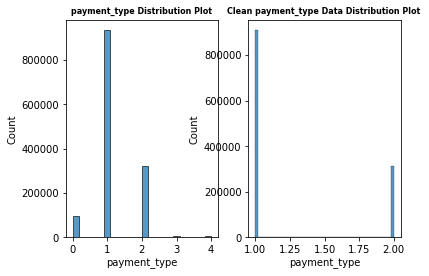

In [11]:
clean_visualizaiton(data,c_data,"payment_type")

 Shown the varaible Payement type has about ~100k rows with zero payemnet type and about ~10k for payemnet type 3 and 4. While Payment types 1 and 2 encapsulate most of the data observations.

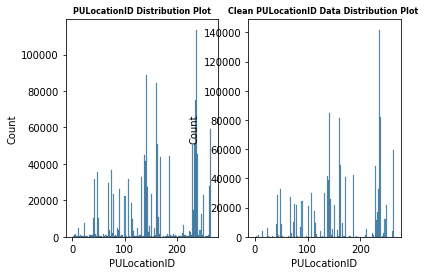

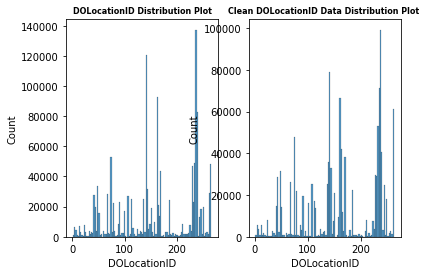

In [12]:
clean_visualizaiton(data,c_data,"PULocationID")
clean_visualizaiton(data,c_data,"DOLocationID")

Most Pickup and drop off locations are those with Ids greater than 100 which , cleaning the data lowers the amount of observations with pick up and drop off location ID between 0 and 100. 

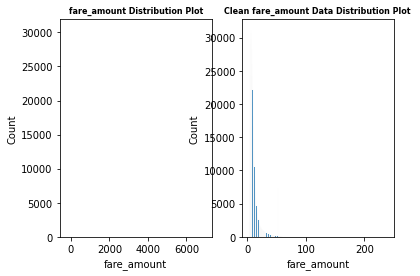

In [13]:
clean_visualizaiton(data.iloc[:500000,:],c_data.iloc[:500000,:],"fare_amount")

We can see that fair amount have extreme outliers with negative values after removing those outliers we are left with the values between 0 and 400

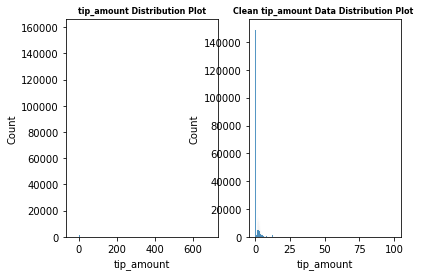

In [14]:
clean_visualizaiton(data.iloc[:500000,:],c_data.iloc[:500000,:],"tip_amount")

It can be interpreted that beforte cleaning there is a tip amount close to a thousand dollar and indeed in the EDA part the maximum value was about 8000 dollars and after celaning we can see that all values 

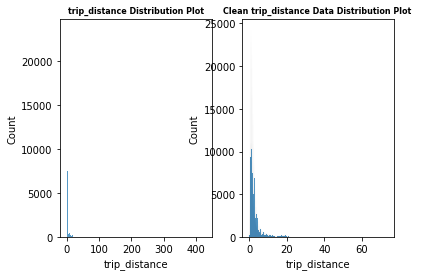

In [15]:
clean_visualizaiton(data.iloc[:900000,:],c_data.iloc[:900000,:],"trip_distance")

Since yellow taxis dont span a zone of riding trips outside NYC the maximum distance a taxi can travcel is 200 miles this is an arbitary value by an educated guess based on the span of the size of NYC but also accounted for for rides with mutiple routes, most rides arew short and span less than 5 miles .

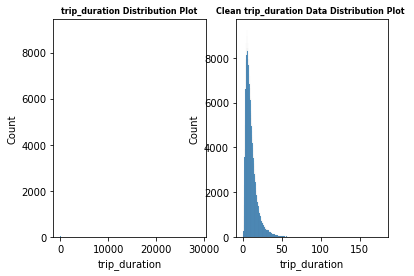

In [16]:
clean_visualizaiton(data.iloc[:500000,:],c_data.iloc[:500000,:],"trip_duration")

Trip duration had some trips with over 720 minutes which is by TlC regulation is not permitted so we decided to include those rides with at most 180 minutes, we can clearly see that most trips span less than 25 minutes. 

## Feature Engineering 

In [17]:
def split_dates(data):
    '''
    Splitting a date- time attribute into date,month,day anmd time.
    Moreover ethis fucntion converts the pick up and drop off time obejcts into 
    Data of trip , month and day. Then the correpsonging pick up and drop off times are 
    spereated as a time object .

        Parameters:
            data (Panda Dataframe): Data as panda dataframe

        Returns:
            data (Panda Dataframe): Data as panda dataframe
    '''
    # Get date portion and assign it to new dataframe column
    data['Date_Trip']=data.iloc[:,1].dt.date
    # Get month poriton and assign it to new dataframe column
    data['Month_Trip']=data.iloc[:,1].dt.month.astype(int)
    # Get day portion and assign it to new dataframe column
    data['Day_Trip']=data.iloc[:,1].dt.day.astype(int)
    #Get time portion and assign it to new dataframe column
    data['PU_Time']=data.iloc[:,0].dt.time
    data['DO_Time']=data.iloc[:,1].dt.time

    return data
    


In [18]:
#To visialize change 

#Clean data
s_data=split_dates(c_data)
#Subset data
s_data=s_data.iloc[:,[16,17,18,19,20]]
#Subsetdata
o_data=c_data.loc[:,["tpep_pickup_datetime","tpep_dropoff_datetime"]]
#Concatanate column-wise
concat=pd.concat([o_data,s_data],axis=1)


print(concat.iloc[[213,43900,355433],:])

       tpep_pickup_datetime tpep_dropoff_datetime   Date_Trip  Month_Trip  \
229     2021-01-01 00:35:17   2021-01-01 00:41:51  2021-01-01           1   
46029   2021-01-02 17:30:20   2021-01-02 17:54:37  2021-01-02           1   
371483  2021-01-11 08:34:04   2021-01-11 08:44:56  2021-01-11           1   

        Day_Trip   PU_Time   DO_Time  
229            1  00:35:17  00:41:51  
46029          2  17:30:20  17:54:37  
371483        11  08:34:04  08:44:56  


We can see that pick up and dropoff datetime (datetime64n) objects  are dispersed into the five columns of types date (datetime64n) object, integer and time (datetime64n) object respectivley to easily manipulate  the data.

In [19]:
def time_slots(data):
    '''
    Splitting a time (datetime64n) objects into dailt time slots being either 
    morning, afternoon, eveningn or late night 

        Parameters:
            data (Panda Dataframe): Data as panda dataframe

        Returns:
            data (Panda Dataframe): Data as panda dataframe
    '''
    
    #Reset index of dataframe
    data=data.reset_index(drop=True)

    #Initalize new column 
    data["trip_time_slot"]="Late Night"

    #Get hour poriton of drtop of time
    dates=data.DO_Time.astype(str).str[:2].astype(int)
    
    #Get index of observations were hours fall into these categories
    morning_idx=data[(dates >= 6 )& (dates< 12)].index
    afternoon_idx=data[(dates >= 12) & (dates< 18)].index
    evening_idx=data[(dates >= 18) & (dates< 22)].index

    #Assign categories
    data.loc[morning_idx, 'trip_time_slot'] = 'Morning'
    data.loc[afternoon_idx, 'trip_time_slot'] = 'Afternoon'
    data.loc[evening_idx, 'trip_time_slot'] = 'Evening'

    return data



In [20]:
#To visialize change 

#Assign time slots of trips
ts_data=time_slots(s_data)
#Subset column 
ts_data=ts_data.loc[:,"trip_time_slot"]
#Subset column 
o_data=s_data.loc[:,["PU_Time","DO_Time"]]
#Concatanate column-wise
concat=pd.concat([o_data,ts_data],axis=1)

print(concat.iloc[[213,43900,355433],:])

         PU_Time   DO_Time trip_time_slot
213     00:11:57  00:15:25     Late Night
43900   17:58:27  18:00:44      Afternoon
355433  15:08:40  15:19:02        Morning


We can see that for these PU/DO Times based on the time in a day we assign different time slots

In [21]:
def assign_holidays(data):
    '''
    This function assigns public holidays to a set of dates in a dataframe,
    it first gets the public holidays from a function called holidays from holiday
    package and then takes inputs for a year and a country and return a dictionary 
    with date of holiday and name , for the ai of our analytics we assign the holiday
    name for that certain day and then assign the name with week for the whole week
    e.g."Christmas is on the 25th of december so this day takes 'Chrsitmas Day' as astring value 
    for the column Holiday and then following days until the saturday of the holiday week take 
    in 'Christmas Week' "

        Parameters:
            data (Panda Dataframe): Data as panda dataframe

        Returns:
            data (Panda Dataframe): Data as panda dataframe
    '''

    #Initalizre a new column as Holiday with all values being No Holiday
    data["Holiday"]="No Holiday"
    #Get set of holidays as a dictionary 
    US_Holidays=h.US(years=2021)

    #Loop for each holiday and assign holiday to date
    for holiday in US_Holidays.items() :
        
        if holiday[1].find("(Observed)") == -1:
            holiday_idx = data[data.Date_Trip == holiday[0]].index
            data.loc[holiday_idx, 'Holiday'] = holiday[1]
            holiday_week_idx= data[(data.Date_Trip > holiday[0])
                     & (data.Date_Trip <=holiday[0]+timedelta(days=6))].index
            data.loc[holiday_week_idx,"Holiday"]=holiday[1].replace("Day","")+"Week"
        else:
            next

    return data




In [22]:
#To visialize change 

#Assign time slots of trips
h_data=assign_holidays(s_data)
#Subset column 
h_data=h_data.loc[:,["Date_Trip","Holiday"]]

print(h_data.iloc[[213,43900,355433],:])

<ipython-input-21-cce75a7d6f43>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Holiday"]="No Holiday"
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


         Date_Trip          Holiday
229     2021-01-01   New Year's Day
46029   2021-01-02  New Year's Week
371483  2021-01-11       No Holiday


As we can see 01/01 gets New Years Day, note that next day gets New years week but its not a holiday this serves for the purpose of comapring the Holiday affect on the same week

In [23]:
def add_features(data):
    '''
    This function condenses total amount paid by a passanger  into sub categories
    trip charges, includes all the fees of services or taxes applied  including airport fee, 
    extrfa charges, mta tax, imporvemnt and congestion surcharges and tolls amount.
    Calucalted total amount which is calcaulted by adding  fare,trip and tip.
    then the function calcualtes the tip in cash for trips paid by credit cards. by subtracting the calcualted total 
    amount by the given total amount , then gives the tip as a percentage for all the columns .

        Parameters:
            data (Panda Dataframe): Data as panda dataframe

        Returns:
            data (Panda Dataframe): Data as panda dataframe
    '''

    #Calcualte trip cahrges 
    data["trip_charges"]=data["airport_fee"]+data["mta_tax"]+data["extra"]+data["improvement_surcharge"]+data["tolls_amount"]+data["congestion_surcharge"]
    #Theortical total amount calcaulted by values 
    data["calculated_total_amount"]=data["fare_amount"]+data["trip_charges"]+data["tip_amount"]

    #Get rows indicies where the trip were paid by cash 
    tip_cash_idx = data[data.payment_type == 2].index
    #Assign tip amount since the tips by cash are not given 
    data.loc[tip_cash_idx, 'tip_amount'] =data.loc[tip_cash_idx, 'calculated_total_amount']-data.loc[tip_cash_idx, 'total_amount']
    
    #Calcaulte tip percentage
    data['tip_percent'] = (data["tip_amount"] / data["calculated_total_amount"]) * 100
    return data



In [24]:
#To visialize change 

#Assign  calcaulted measures relatred to tip
f_data=add_features(c_data)
#Subset column 
f_data=f_data.iloc[:,[5,6,10,21,22,23]]

print(f_data.iloc[[213,43900,355433],:])

        payment_type  fare_amount  tip_amount  trip_charges  \
229                1          8.0        2.36           3.8   
46029              1         17.0        4.05           5.8   
371483             1          8.5        2.35           5.8   

        calculated_total_amount  tip_percent  
229                       14.16    16.666667  
46029                     26.85    15.083799  
371483                    16.65    14.114114  


These are the data used to calculate the percentage tip and those measures are related to moneatry attributes 

In [25]:

def drop_incorrect(data):
    '''
    Since obviously not all passangers pay tips so there are disperanices between 
    calcaulted amount and given amount in data to ensure consistency we remove the data 
    were the trip associated charges which are fare amount, tip amount and trip charges are
     not equal to the calcualted total_amount.
    
        Parameters:
            data (Panda Dataframe): Data as panda dataframe

        Returns:
            data (Panda Dataframe): Data as panda dataframe
    '''
    data = data[(data['fare_amount']+data['tip_amount']+data['trip_charges']) == data['calculated_total_amount']]
    return data



In [26]:
d_data=drop_incorrect(f_data)

print(len(f_data))
print(len(d_data))

1220960
930161


We can see that 23.8% of observations have disperanices between calcualted total amount and reported amounts by given data so we remove them

In [27]:
def assign_location(data):
    '''
    This function assigns boroughs of trips where the passanger is dropped off 
    
        Parameters:
            data (Panda Dataframe): Data as panda dataframe

        Returns:
            data (Panda Dataframe): Data as panda dataframe
    '''
    #Change the path below to the location of the taxi look up file 
    locations=pd.read_csv("taxi+_zone_lookup.csv")
    #Get the boroughs 
    locations=locations.iloc[:,[0,1]]

    #Merge gthe boroughs with the location drop off ID
    data=pd.merge(data, locations, left_on="DOLocationID", right_on="LocationID").drop('LocationID', axis=1)
    return data


In [28]:
#To visialize change 

#Assign  locations
l_data=assign_location(c_data)

#Subset column 
l_data=l_data.iloc[:,[3,24]]

print(l_data.iloc[[213,43900,355433],:])

        DOLocationID    Borough
213               43  Manhattan
43900             68  Manhattan
355433            90  Manhattan


We can see that we genralize the locations to different boroughs in newyork being either Manhattan,Bronx,Queens,Brooklyn and staten island.

In [29]:
def subset_data(data):
    '''
    This function subsets the columns we ony need for the data analysis
    
        Parameters:
            data (Panda Dataframe): Data as panda dataframe

        Returns:
            data (Panda Dataframe): Data as panda dataframe
    '''
    data=data.iloc[:,[16,17,18,22,19,20,21,26,5,25]]
    return data



In [30]:
data=get_data("2021","01","yellow")
data=clean_data(data)
data=clean_data(data)
data=split_dates(data)
data=time_slots(data)
data=assign_holidays(data)
data=add_features(data)
data=drop_incorrect(data)
data=assign_location(data)
data=subset_data(data)

print(data.iloc[[839483,438994,213],:])


         Date_Trip  Month_Trip  Day_Trip                     Holiday  \
839483  2021-01-18           1        18  Martin Luther King Jr. Day   
438994  2021-01-02           1         2             New Year's Week   
213     2021-01-01           1         1              New Year's Day   

         PU_Time   DO_Time trip_time_slot    Borough  payment_type  \
839483  15:33:31  15:57:33      Afternoon  Manhattan             1   
438994  16:55:38  17:14:11      Afternoon  Manhattan             1   
213     16:10:52  16:12:06      Afternoon  Manhattan             2   

        tip_percent  
839483     0.000000  
438994    10.958904  
213        0.000000  


After all the cleaning  and proccessing of all features in teh data these are the attributes to be used to analyze and answer our questions

## Analytics


In [31]:
def get_alldata():

    temp=pd.DataFrame({})


    for i in ["%.2d" % i for i in range(1,13)]:
        data=get_data("2021",i,"yellow")
        data=clean_data(data)
        data=split_dates(data)
        data=time_slots(data)
        data=assign_holidays(data)
        data=add_features(data)
        data=drop_incorrect(data)
        data=assign_location(data)
        data=subset_data(data)
        temp=pd.concat([temp,data])



    return temp

In [32]:
#Store all data
data=get_alldata()

In [39]:
holidays=data['Holiday'].sort_values().unique()

In [93]:
print(holidays[[14,10,17,0]])

["New Year's Day" 'Martin Luther King Jr. Day' 'Thanksgiving'
 'Christmas Day']


We confine ourselves into analysing those holidays listed above

### How does the tipping behaviour changes along the day of holidays , Is there a certain holiday and timing were passangers prefer to tip more, which holiday and time are most rewarding for a taxi driver?

In [51]:
#Convert drop off time to hours 
data["DO_Time"]=data.DO_Time.astype(str).str[:2].astype(int)

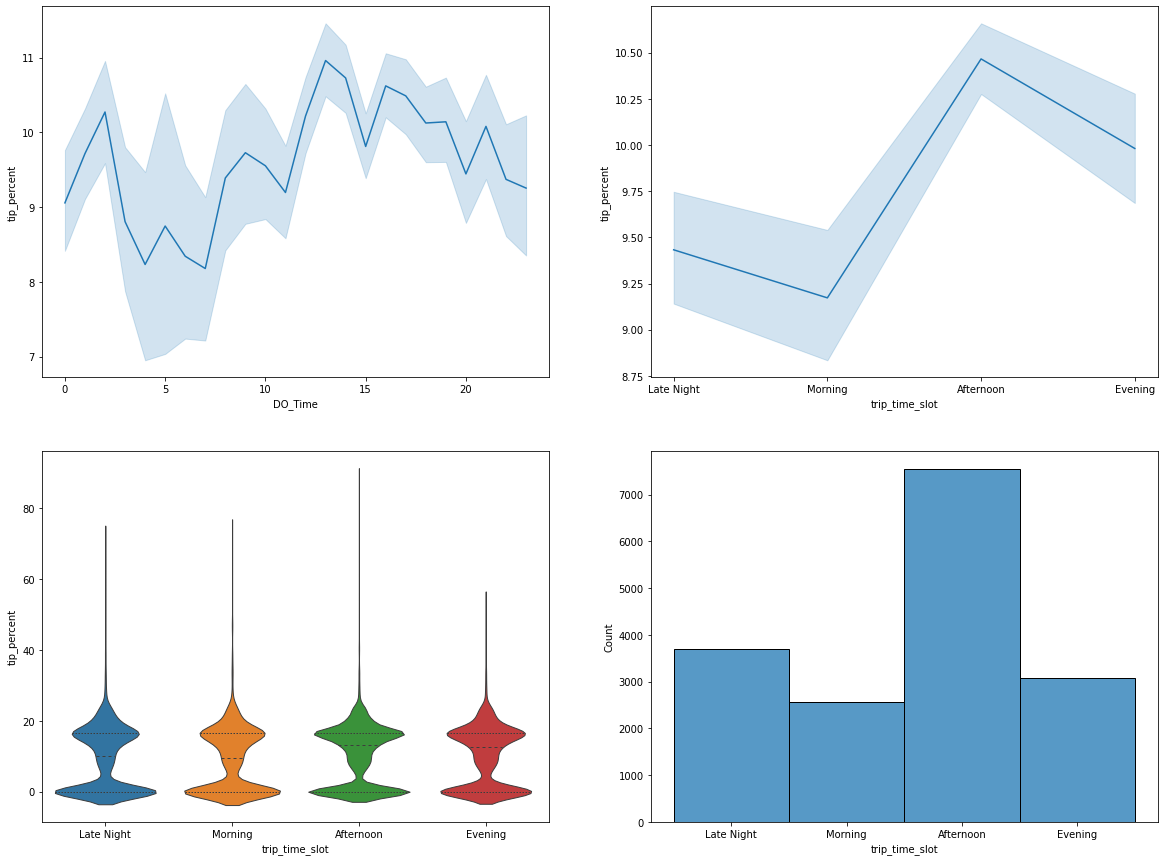

In [55]:
#New years day 
f,axes = plt.subplots(2,2, figsize=(20, 15))


sns.lineplot(data=data[data['Holiday']== "New Year's Day"], x= "DO_Time",y="tip_percent", ax = axes[0][0])
sns.lineplot(data=data[data['Holiday']== "New Year's Day"], x= "trip_time_slot",y="tip_percent", ax = axes[0][1])
sns.violinplot(data=data[data['Holiday']== "New Year's Day"], x="trip_time_slot", y="tip_percent", split=True, inner="quart", linewidth=1, ax= axes[1][0])
sns.histplot(data=data[data['Holiday']== "New Year's Day"], x= "trip_time_slot", ax = axes[1][1])

plt.show()

On New Year's day, passengers tend to tip the highest between 10-11% at 2:00-3:00 am and 13:00-14:00 pm, tip the lowest between 8-9% at 4:00-7:00 am. Typically afternoons are considered the period were passangers pay a mean tip of 10.50%. Most rides occur on afternoon. In which the best time to be most active as a taxi driver is on afternoons.

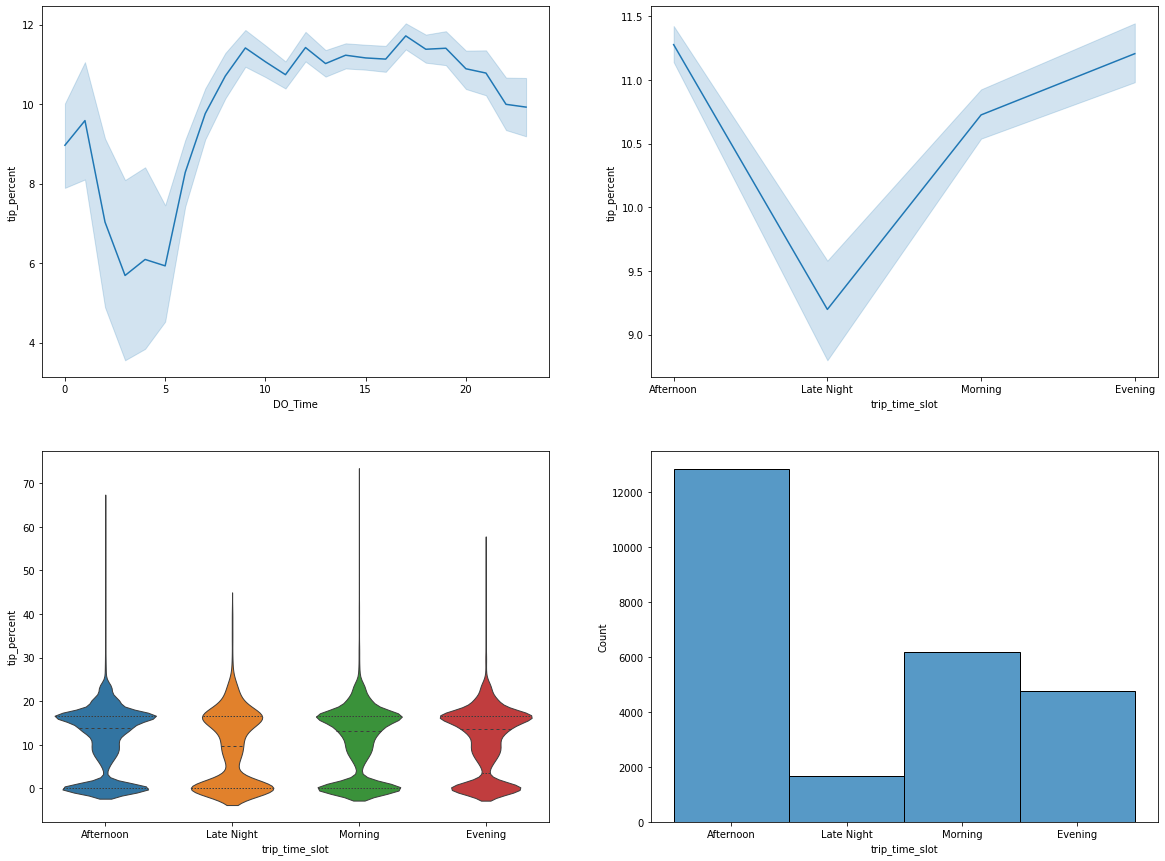

In [74]:
#MLK day 
f,axes = plt.subplots(2,2, figsize=(20, 15))


sns.lineplot(data=data[data['Holiday']== "Martin Luther King Jr. Day"], x= "DO_Time",y="tip_percent", ax = axes[0][0])
sns.lineplot(data=data[data['Holiday']== "Martin Luther King Jr. Day"], x= "trip_time_slot",y="tip_percent", ax = axes[0][1])
sns.violinplot(data=data[data['Holiday']== "Martin Luther King Jr. Day"], x="trip_time_slot", y="tip_percent", split=True, inner="quart", linewidth=1, ax= axes[1][0])
sns.histplot(data=data[data['Holiday']== "Martin Luther King Jr. Day"], x= "trip_time_slot", ax = axes[1][1])

plt.show()

On MLK's day, passengers tend to tip the highest between 11-12% at 9:00 am -19:00 pm , tip the lowest between 5-6% at 3:00-4:00 am. Typically Afternoon's and Evening's are considered the periods were passangers pay the highest tips with a mean value of 11.2% and 11.4% resepctivley. Although most rides occur on afternoons, most optimal period to get the hgihest amount of tip is in the  anytime between 9:00 am -19:00 pm maximizing rides on afternoons due to high number of taxi riders in the afternoon.

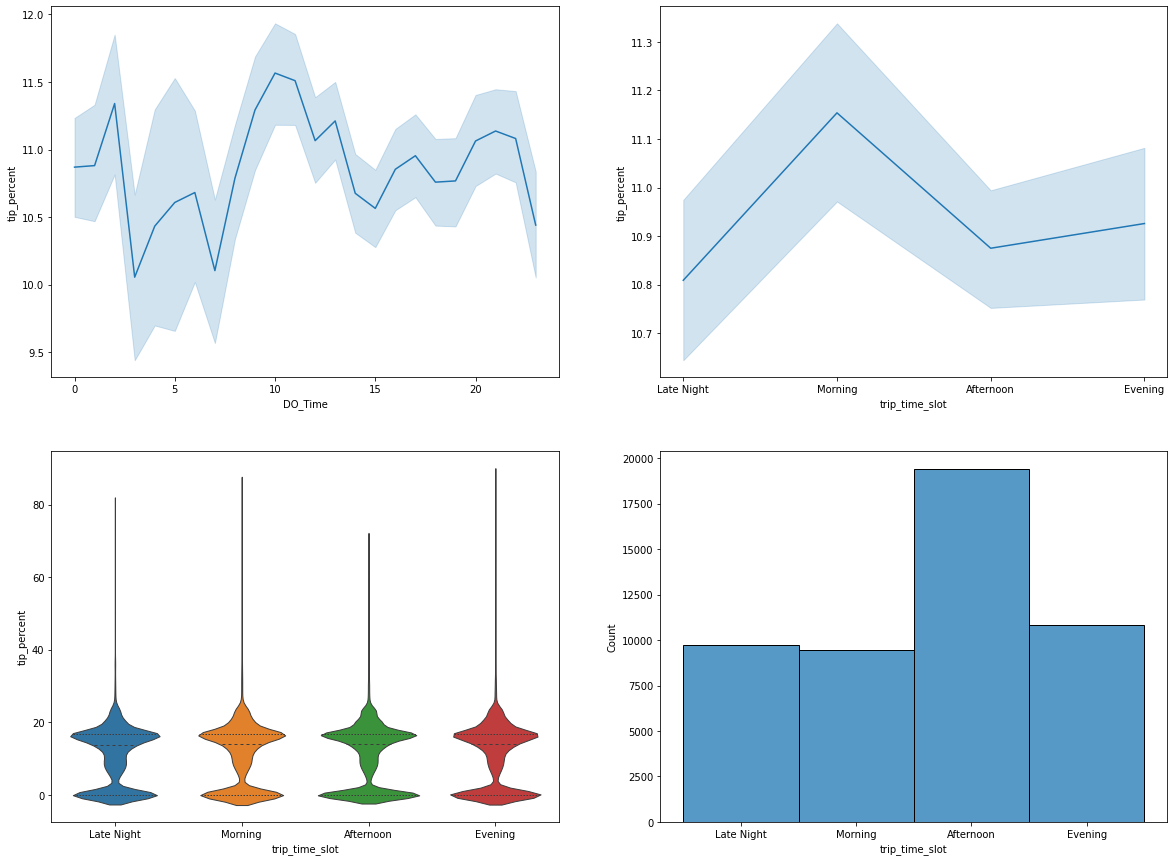

In [63]:
#Thanksgiving 
f,axes = plt.subplots(2,2, figsize=(20, 15))


sns.lineplot(data=data[data['Holiday']== "Thanksgiving"], x= "DO_Time",y="tip_percent", ax = axes[0][0])
sns.lineplot(data=data[data['Holiday']== "Thanksgiving"], x= "trip_time_slot",y="tip_percent", ax = axes[0][1])
sns.violinplot(data=data[data['Holiday']== "Thanksgiving"], x="trip_time_slot", y="tip_percent", split=True, inner="quart", linewidth=1, ax= axes[1][0])
sns.histplot(data=data[data['Holiday']== "Thanksgiving"], x= "trip_time_slot", ax = axes[1][1])

plt.show()

On Thanksgiving day, passengers tend to tip the highest between 11-12% at 2:00-3:00 am and 10:00-11:00 am, tip the lowest between 10-10.5% at 4:00-7:00 am. Typically Mornings are considered the period were passangers pay the highest tip with a mean value of 11.15%. Although most rides occur on afternoons, most optimal period to get the highest amount of tip is in the morning between 10:00-11:00 am.

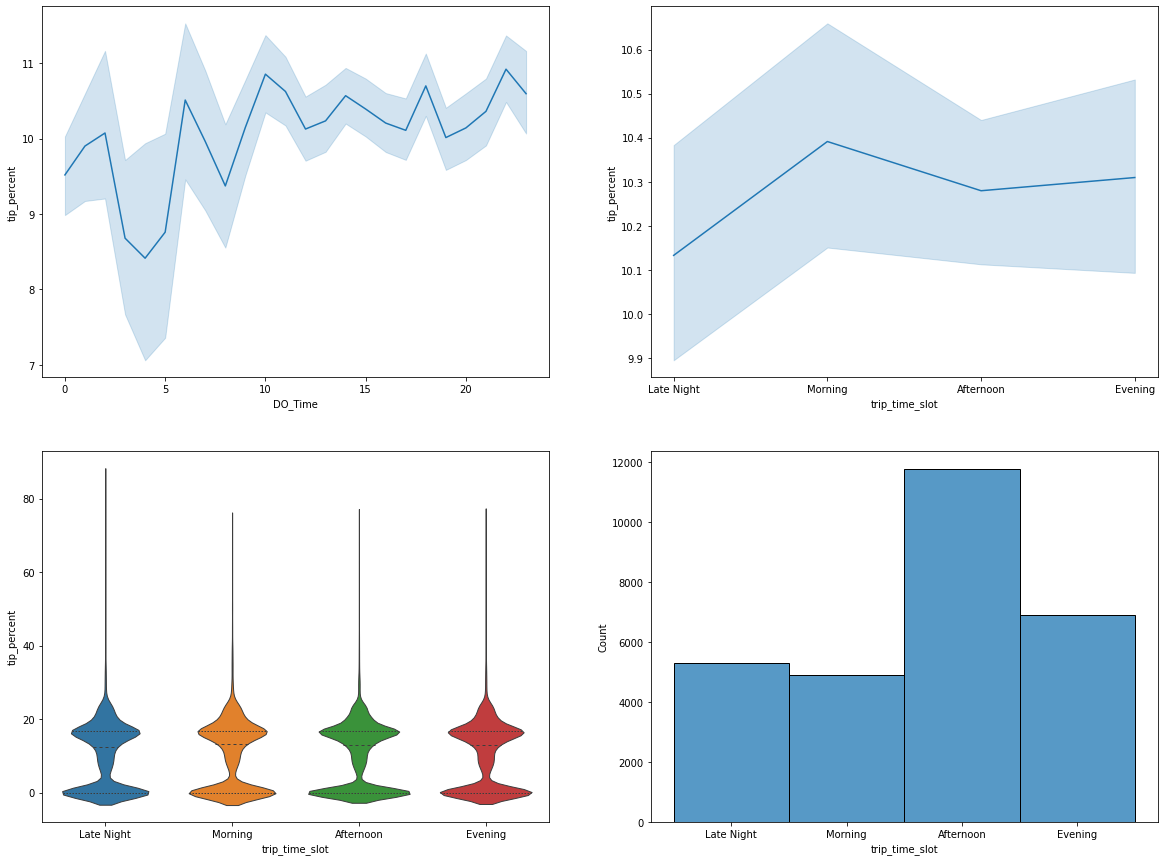

In [64]:
#Christmas 
f,axes = plt.subplots(2,2, figsize=(20, 15))


sns.lineplot(data=data[data['Holiday']== "Christmas Day"], x= "DO_Time",y="tip_percent", ax = axes[0][0])
sns.lineplot(data=data[data['Holiday']== "Christmas Day"], x= "trip_time_slot",y="tip_percent", ax = axes[0][1])
sns.violinplot(data=data[data['Holiday']== "Christmas Day"], x="trip_time_slot", y="tip_percent", split=True, inner="quart", linewidth=1, ax= axes[1][0])
sns.histplot(data=data[data['Holiday']== "Christmas Day"], x= "trip_time_slot", ax = axes[1][1])

plt.show()

On Christmas day, passengers tend to tip the highest between 10-11% at 7:00-8:00 am, 10:00-11:00 am, 17:00-18:00 pm and 22:00-23:00 pm tip the lowest between 8-9% at 4:00-5:00 am. Typically Mornings are considered the period were passangers pay the highest tip with a mean value of 10.4%. Although most rides occur on afternoons, most optimal period to get the highest amount of tip is in the morning between 10:00-11:00 am.

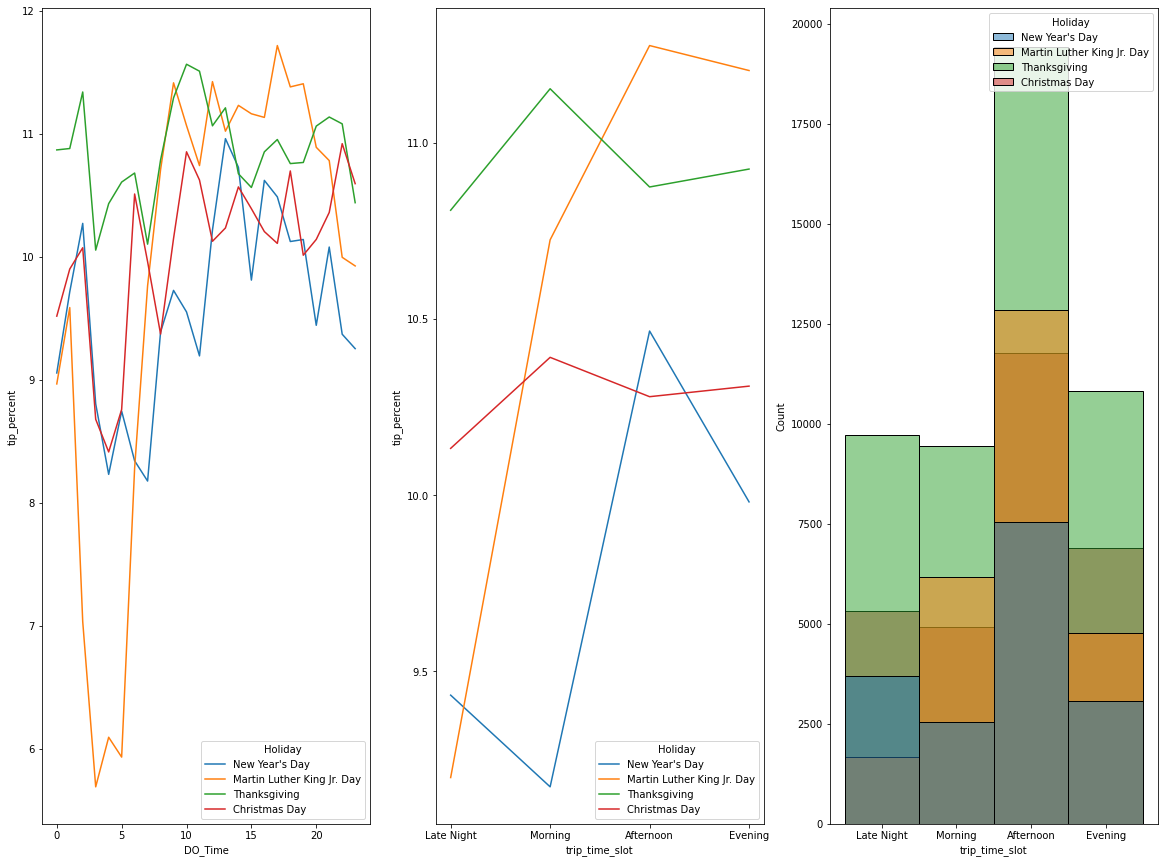

In [119]:
#Comparing Newyear,Christmas,MLK and Thanks gving
f,axes = plt.subplots(1,3, figsize=(20, 15))

comparsion_data=data[(data["Holiday"]== "New Year's Day") | (data["Holiday"]== "Martin Luther King Jr. Day")|(data["Holiday"]== "Thanksgiving")|(data["Holiday"]== "Christmas Day")]
comparsion_data=comparsion_data.reset_index(drop=True)
sns.lineplot(data=comparsion_data, x= "DO_Time",y="tip_percent",hue="Holiday",ci=None, ax = axes[0])
sns.lineplot(data=comparsion_data, x= "trip_time_slot",y="tip_percent",hue="Holiday",ci=None, ax = axes[1])
sns.histplot(data=comparsion_data, x= "trip_time_slot", hue="Holiday",ax = axes[2])

plt.show()

Comparing the different holidays, we can observe in the first graph that all holidays were passangers ride between 3:00-6:00 am graniulate the lowest amount of tip with MLK's day being the lowest about 6%, while on average all the rides for all holidays between 12:00-22:00 pm have an averge tip of 11% with MLK being highest by 1% to a value of 12%. On christmas and thanksgiving passaengers give the most tip in the morning while on New year and MLK day passangers give the most tips in the afternoon. On these holidays most rides occur in the afternoon, while the lowest are in the nights and mornings.

The optimal time and holiday to receive the highest tip are on MLK day on Afternoon, Since the average tip is 11.4% with rides surpassing 12500 taxi ride in NYC.

### How does the tipping behaviour changes along the week of each holiday, which week has highest paid tips to taxi drivers?

The weeks are as follows 

In [96]:
print(holidays[[15,11,18,1]])

["New Year's Week" 'Martin Luther King Jr. Week' 'ThanksgivingWeek'
 'Christmas Week']


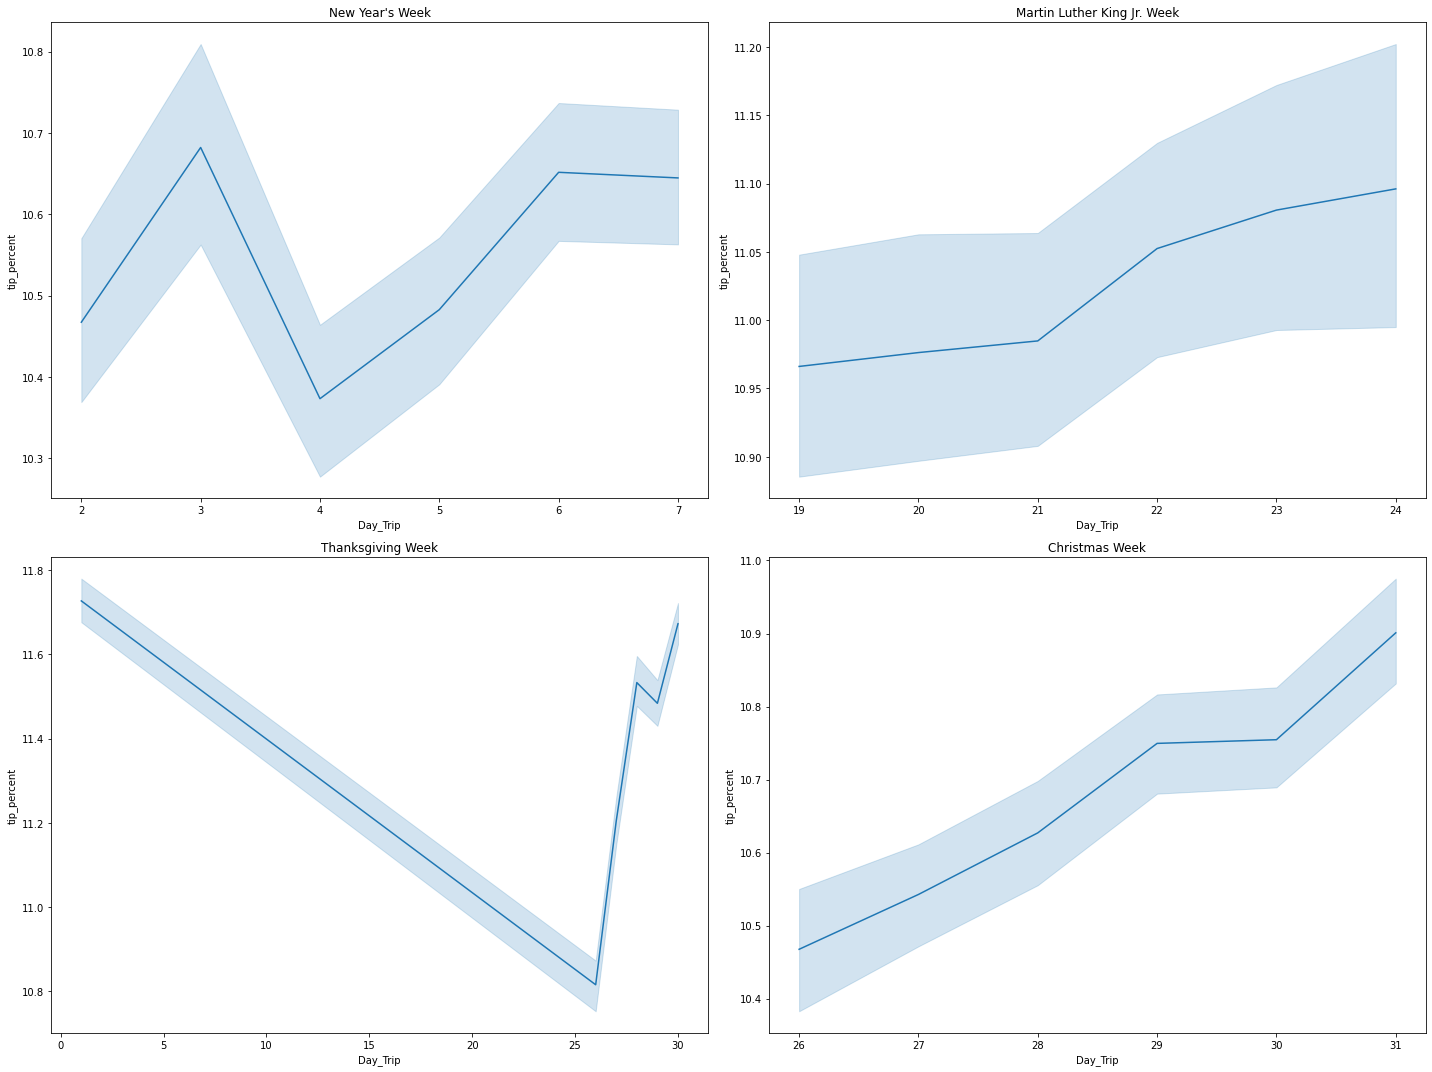

In [128]:
# Observing for each weekday
f, axes = plt.subplots(2,2, figsize=(20, 15))

sns.lineplot(data=data[data['Holiday'] == "New Year's Week"], x="Day_Trip", y="tip_percent" , ax=axes[0,0]).set_title("New Year's Week")
sns.lineplot(data=data[data['Holiday'] == 'Martin Luther King Jr. Week'], x="Day_Trip", y="tip_percent" , ax=axes[0,1]).set_title('Martin Luther King Jr. Week')

sns.lineplot(data=data[data['Holiday'] == 'ThanksgivingWeek'], x="Day_Trip", y="tip_percent" , ax=axes[1,0]).set_title('Thanksgiving Week')
sns.lineplot(data=data[data['Holiday'] == 'Christmas Week'], x="Day_Trip", y="tip_percent" , ax=axes[1,1]).set_title('Christmas Week')
plt.tight_layout()
plt.show() 

Its interesting that not all holidays follow a same trend, we can see that on new years week the average amount of tip reaches a maximum at 3rd and 6th day of the week with a value of about 10.7%. Moreover on ML week the average amount of tip keep increasing from 10.9% to about 11.2% along the week. Similarly Christmas week has an increasing trend from abour 10.5% to 11% along the week Suprisingly thanksgiving trend in creases drastically from the 25th to 31st starting with an average tip of 10.8% to 11.7% this may be explainable by more people are using the taxi to go to airports.

In conclusion New years week has the highest variation with lowest on 4th day of the week with an average tip of 10.3% while the best holidays for taxi drivers are MLK and Christams weeks.

### Does any borough have signficantly different tips amount for different holidays, which borough has the maximum amount of tips and at which holiday season? 

In [105]:
Holiday_data=data[(data["Holiday"]== "New Year's Day") | (data["Holiday"]== "Martin Luther King Jr. Day")|(data["Holiday"]== "Thanksgiving")|(data["Holiday"]== "Christmas Day")]

The brooughs are as follows

In [110]:
boroughs=data['Borough'].sort_values().unique()

In [120]:
print(boroughs[[0,1,3,4,5]])

['Bronx' 'Brooklyn' 'Manhattan' 'Queens' 'Staten Island']


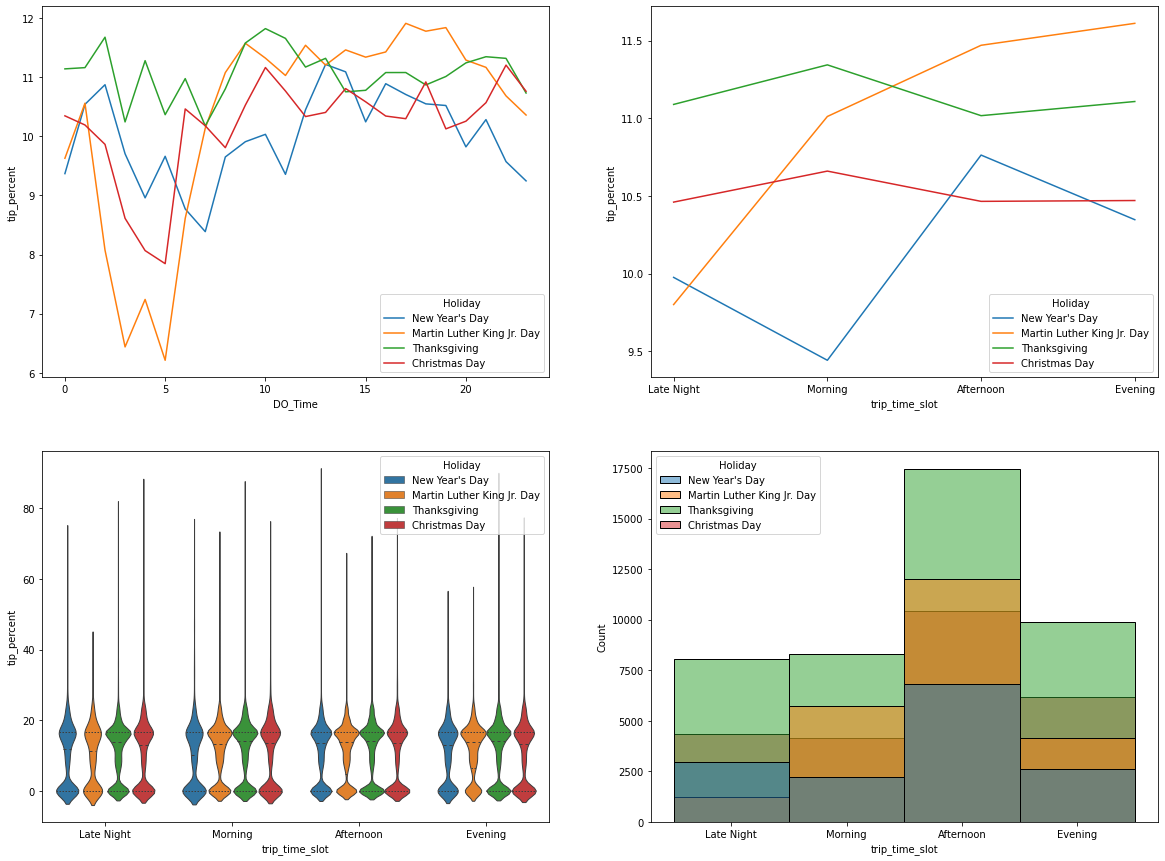

In [109]:
#Manhattan Borough
f,axes = plt.subplots(2,2, figsize=(20, 15))


sns.lineplot(data=Holiday_data[Holiday_data['Borough']== "Manhattan"], x= "DO_Time",y="tip_percent",hue="Holiday",ci=None, ax = axes[0][0])
sns.lineplot(data=Holiday_data[Holiday_data['Borough']== "Manhattan"], x= "trip_time_slot",y="tip_percent",hue="Holiday",ci=None, ax = axes[0][1])
sns.violinplot(data=Holiday_data[Holiday_data['Borough']== "Manhattan"], x="trip_time_slot", y="tip_percent",hue="Holiday", ci=None, inner="quart", linewidth=1, ax= axes[1][0])
sns.histplot(data=Holiday_data[Holiday_data['Borough']== "Manhattan"], x= "trip_time_slot",hue="Holiday", ax = axes[1][1])

plt.show()

In Manhattan , across all holidays between 3:00-5:00 am which is consdiered to be late at night there is a drop of passangers amount riding taxi which correpsonds with lower amount of tips being the lowest for MLK day 6-7%, followed by New years and christmas between 8-9%. Suprisngly in Manhattan during thanksgiving passangers tend to tip 10-12% along all day. 

Average tips are higher in the mornings for Thanksgiving and chrfistmas with a mean values of 10.6% and 11.4% respectivley, in the afternoons on New years day and the eveings on MLK day. While the average tip is constant about 10.5% and 11% for thanksgiving and christmas , the amount of tip a passanger gives on new years in mahattan greatly depend on the time of the day with the lowest being in the morning at about 9.4%. Along the day Average amount of tips increases on MLK day.

 Lowest rides in manhattan across all holiday seasons are late night rides with thr afternoon being greates at an average of 3000 rides where afternoons have an average of 10,000 rides.

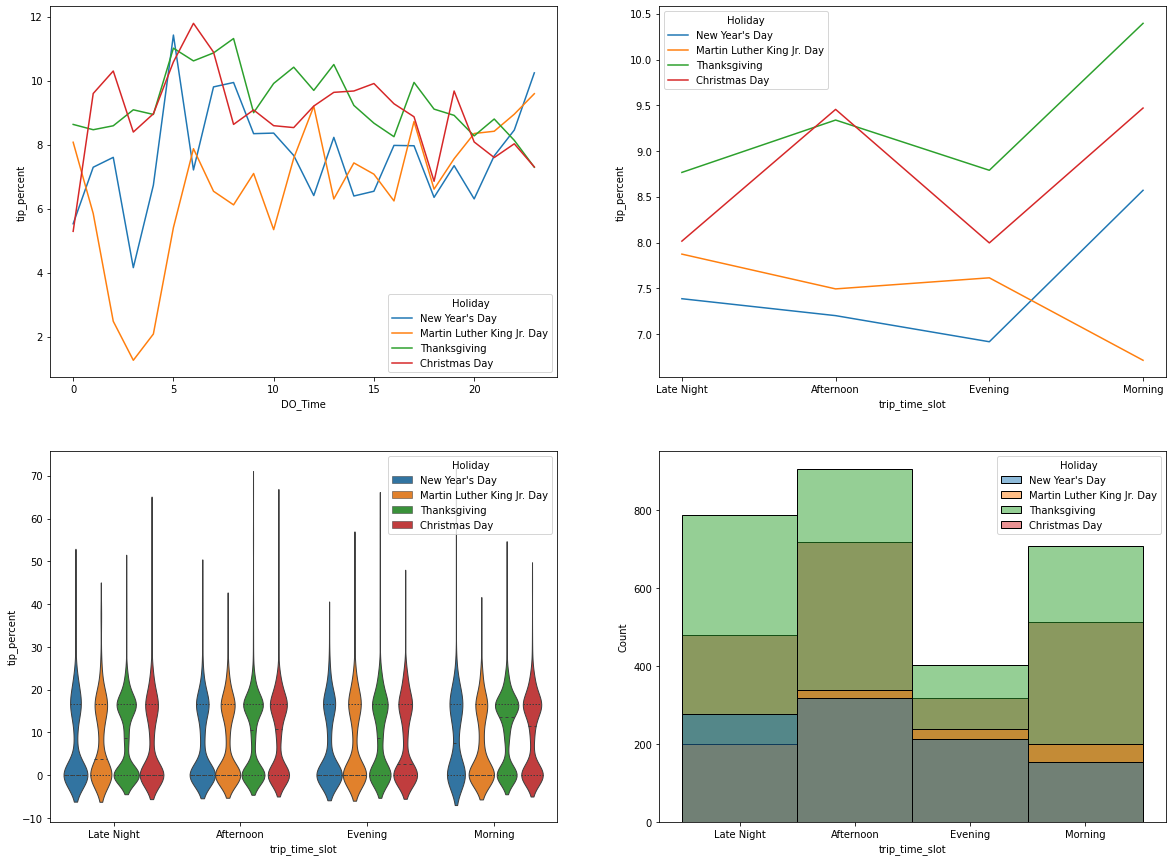

In [117]:
#Queens Borough
f,axes = plt.subplots(2,2, figsize=(20, 15))


sns.lineplot(data=Holiday_data[Holiday_data['Borough']== "Queens"], x= "DO_Time",y="tip_percent",hue="Holiday",ci=None, ax = axes[0][0])
sns.lineplot(data=Holiday_data[Holiday_data['Borough']== "Queens"], x= "trip_time_slot",y="tip_percent",hue="Holiday",ci=None, ax = axes[0][1])
sns.violinplot(data=Holiday_data[Holiday_data['Borough']== "Queens"], x="trip_time_slot", y="tip_percent",hue="Holiday", ci=None, inner="quart", linewidth=1, ax= axes[1][0])
sns.histplot(data=Holiday_data[Holiday_data['Borough']== "Queens"], x= "trip_time_slot",hue="Holiday", ax = axes[1][1])

plt.show()

In Queens , across all holidays between 3:00-5:00 am which is consdiered to be late at night there is an increase of passangers amount riding taxi which correpsonds with lower amount of tips being the lowest for MLK day 0-2%, followed by New years between 4-6%. Suprisngly in Manhattan during thanksgiving passangers tend to tip more about 8-12% along all day while on christmas tips range from 5%-12% with teh highest at about 11.9% at about 6:00 am. 

Average tips are higher in the mornings for Thanksgiving, chrfistmas and new years with an average value of 8.5%, 9.5% and 10.5% respectivley and lowest on the evenings of these holidays with an average values of 6.75%, 7.75% and 8.75% respectivley. While the average tip delcines on MLK day as day progresses being the highest at late night with an average value of 8% and lowest about 6.5 at the morning.

 Lowest number of rides in queens across all holiday seasons are evening  rides with afternoon having an average of 200 rides across those holidays, while afternoons has the largest number of rides at about 500 rides. 

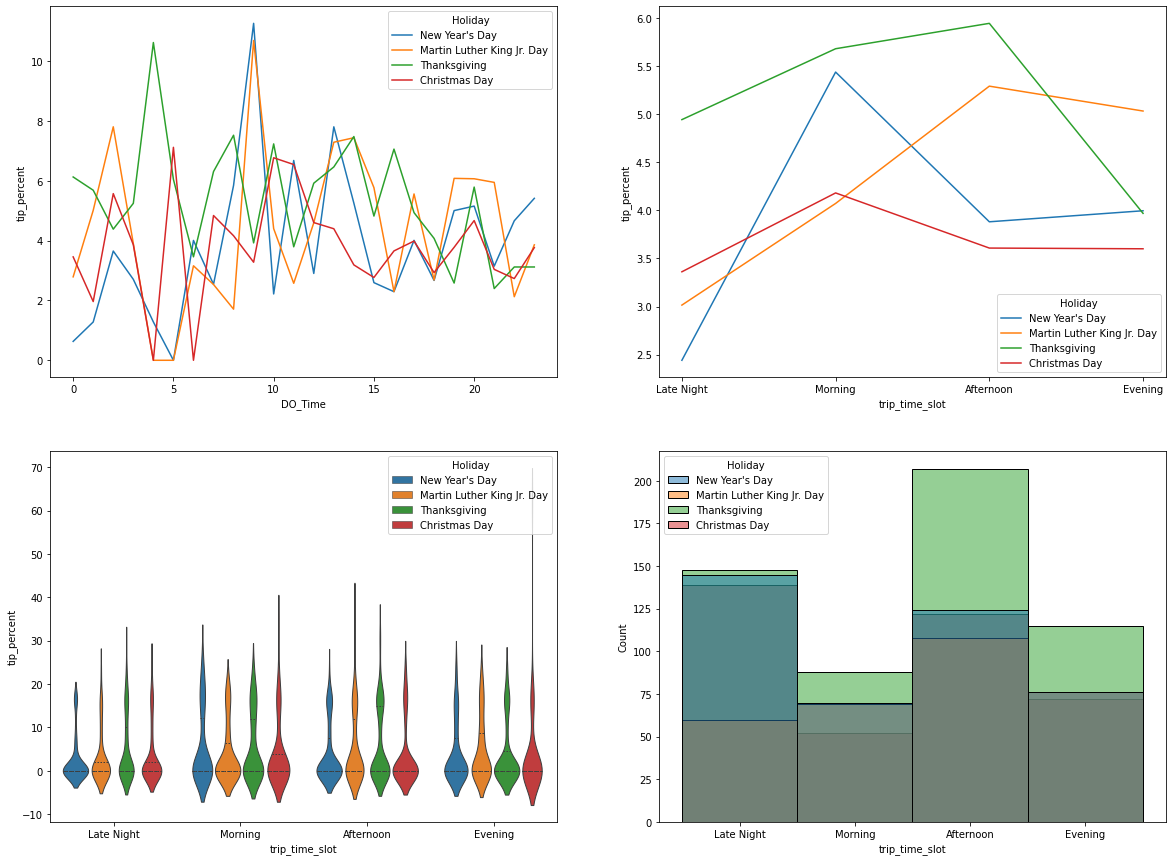

In [113]:
#Bronx Borough
f,axes = plt.subplots(2,2, figsize=(20, 15))


sns.lineplot(data=Holiday_data[Holiday_data['Borough']== "Bronx"], x= "DO_Time",y="tip_percent",hue="Holiday",ci=None, ax = axes[0][0])
sns.lineplot(data=Holiday_data[Holiday_data['Borough']== "Bronx"], x= "trip_time_slot",y="tip_percent",hue="Holiday",ci=None, ax = axes[0][1])
sns.violinplot(data=Holiday_data[Holiday_data['Borough']== "Bronx"], x="trip_time_slot", y="tip_percent",hue="Holiday", ci=None, inner="quart", linewidth=1, ax= axes[1][0])
sns.histplot(data=Holiday_data[Holiday_data['Borough']== "Bronx"], x= "trip_time_slot",hue="Holiday", ax = axes[1][1])

plt.show()

In Bronx , its the most voltaile borough in terms of tips across all holidays along the day. In the morning periods passengers tip between 0-12% with the highest being on Thanksgiving,New years and Christmas about 11%. As day progresses into the evening and night people behaviour tend to be similar where they tip between 3-5% across all holidays.

Average tips are higher in the afternoons of Thanksgiving and MLS  with an average value of 6% and 5.25% respectivley and lowest on the latenights of New years, MLK and Christmas with an average values of 2.5%, 3% and 3.5% respectivley. Suprisingly on Thanksgiving Evenings tend to have low number of rides corresponding with a lower average tip with value of 4%.

 Lowest number of rides in queens across all holiday seasons are morning rides with   an average of 50 rides across those holidays, while afternoons has the largest number of rides at about 100 rides. 

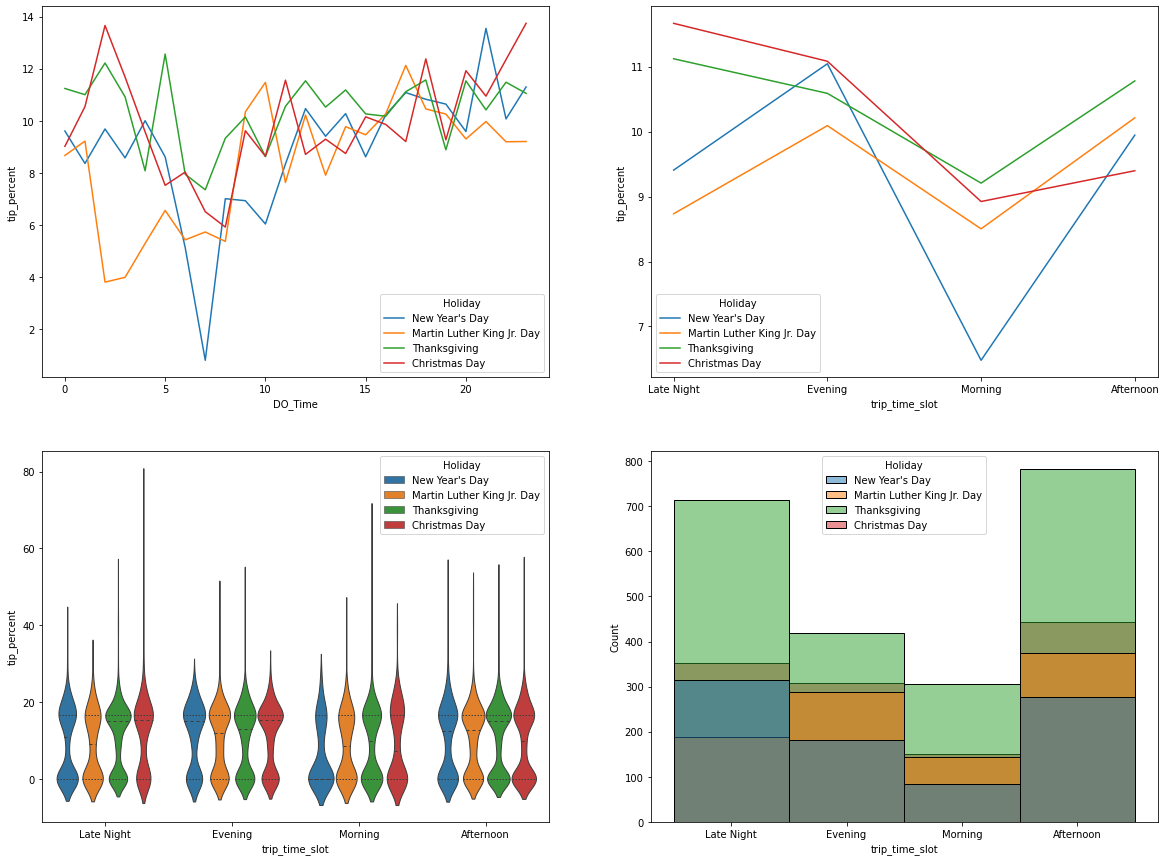

In [114]:
#Brooklyn Borough
f,axes = plt.subplots(2,2, figsize=(20, 15))


sns.lineplot(data=Holiday_data[Holiday_data['Borough']== "Brooklyn"], x= "DO_Time",y="tip_percent",hue="Holiday",ci=None, ax = axes[0][0])
sns.lineplot(data=Holiday_data[Holiday_data['Borough']== "Brooklyn"], x= "trip_time_slot",y="tip_percent",hue="Holiday",ci=None, ax = axes[0][1])
sns.violinplot(data=Holiday_data[Holiday_data['Borough']== "Brooklyn"], x="trip_time_slot", y="tip_percent",hue="Holiday", ci=None, inner="quart", linewidth=1, ax= axes[1][0])
sns.histplot(data=Holiday_data[Holiday_data['Borough']== "Brooklyn"], x= "trip_time_slot",hue="Holiday", ax = axes[1][1])

plt.show()

In Brooklyn  , across all holidays between 00:00-3:00 am which is consdiered to be late at night  there is an increase of passangers amount riding taxi which correpsonds with higher amount of tips being the lowest for MLK day with values between 8-10%, followed by New years, Thanksgiving and Christmas with values of 9%, 12% and 14%. Then amount of tips decrease between 6:00-10:00 am with lowest being on New years day, MLK, Christmas and Thanksgiving correpsonding to values of 1%,6%,6% and 8% resepctivley. Suprisnigly amount fo tips tend to increase from 10:00 am with an average value of 8% to 12% across all holidays.

Average tips on Chrsitmas and thanksgiving have same trend across different periods of the day hitting a high percentage at late nigjhts about 11% and 12% respectivley then hitting a low at mornings flowed by a rise to 11 and 9.5% respectivley while on New years day and MLK highest average tips are in the eveinings with values of about 10% and 11% respectivley and lowest in the mornings with anout 6% and 9% respectivley.

 Lowest number of rides in queens across all holiday seasons are morning rides with  an average of 175 rides, while afternoons has the largest number of rides at about 450 rides. 

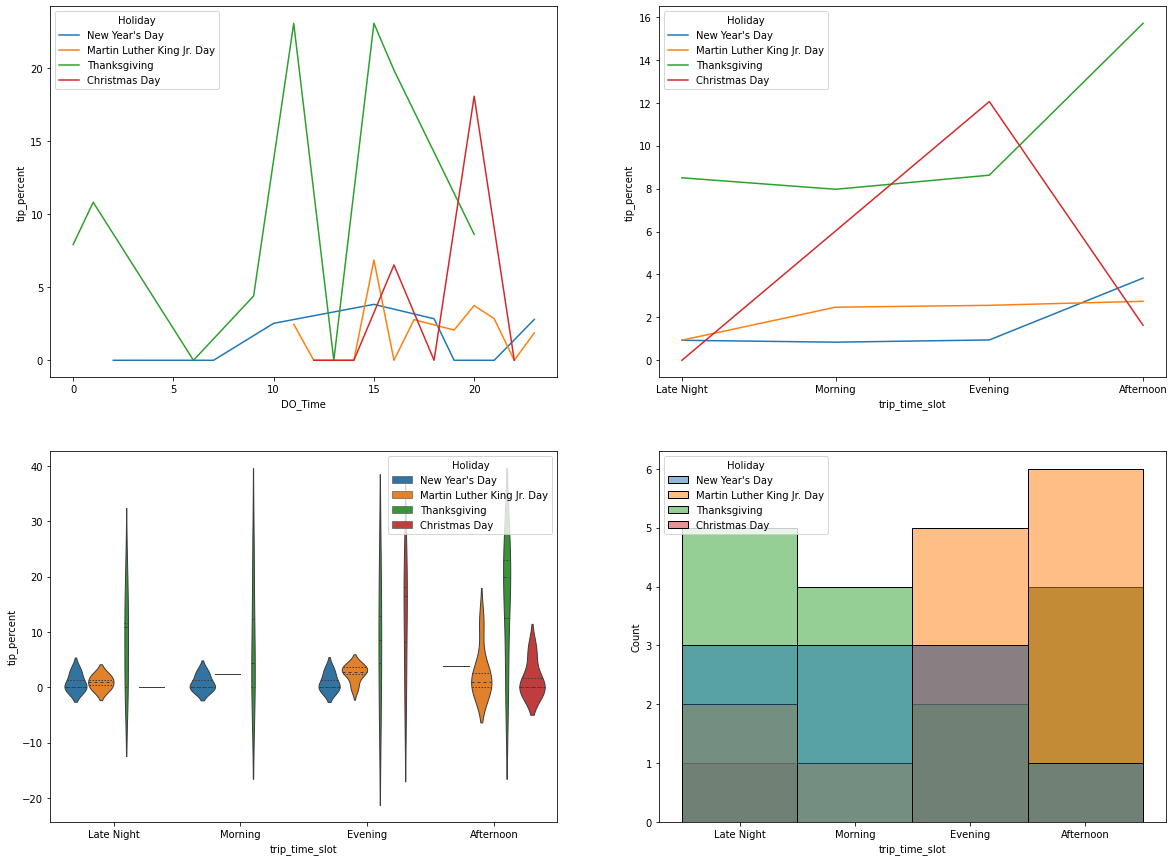

In [121]:
#Dtaten Island
f,axes = plt.subplots(2,2, figsize=(20, 15))


sns.lineplot(data=Holiday_data[Holiday_data['Borough']== "Staten Island"], x= "DO_Time",y="tip_percent",hue="Holiday",ci=None, ax = axes[0][0])
sns.lineplot(data=Holiday_data[Holiday_data['Borough']== "Staten Island"], x= "trip_time_slot",y="tip_percent",hue="Holiday",ci=None, ax = axes[0][1])
sns.violinplot(data=Holiday_data[Holiday_data['Borough']== "Staten Island"], x="trip_time_slot", y="tip_percent",hue="Holiday", ci=None, inner="quart", linewidth=1, ax= axes[1][0])
sns.histplot(data=Holiday_data[Holiday_data['Borough']== "Staten Island"], x= "trip_time_slot",hue="Holiday", ax = axes[1][1])

plt.show()

In Staten Island, on New years day tips range from 0-5% along the day eith the higest average value of 4% on the afternoons with an average of 2 rides being lowest on afternoons with zero rides and highest on latenight and evenings about 3 rides.

 On MLK day tips also range from 0-5% with constant average value of 3% from morining until afternoon with an average of 5 rides. Meanwhile on Thanksgiving day tips range from 0-25% with the highest tips given at 10:00 am and 15:00 pm being about 25%, as day progresses from average tips increase from about 8% for latenights, mornings and evenings to 16% at after noons, the average number of rides is highest at nights being 5 and lowest in the afternoons being 1 ride. 

Interesrtingly on Christmas day peaks of tips are at about 16:00 pm and 20:00 pm having values of about 6& and 17% respectivley, from afternoon to evenings on Christmas day averag amount of tip increases from about 1% to 12%, average rides on Christmas are the lowest with highest being 3 at evenings and 1 at mornings.


###  How does the tipping behaviour changes along the week of each holiday for each borough?

The weeks are as follows

In [122]:
print(holidays[[15,11,18,1]])

["New Year's Week" 'Martin Luther King Jr. Week' 'ThanksgivingWeek'
 'Christmas Week']


In [129]:
Borough_data=data[(data["Borough"]== "Manhattan") | (data["Borough"]== "Bronx")|(data["Borough"]== "Brooklyn")|(data["Borough"]== "Queens")]

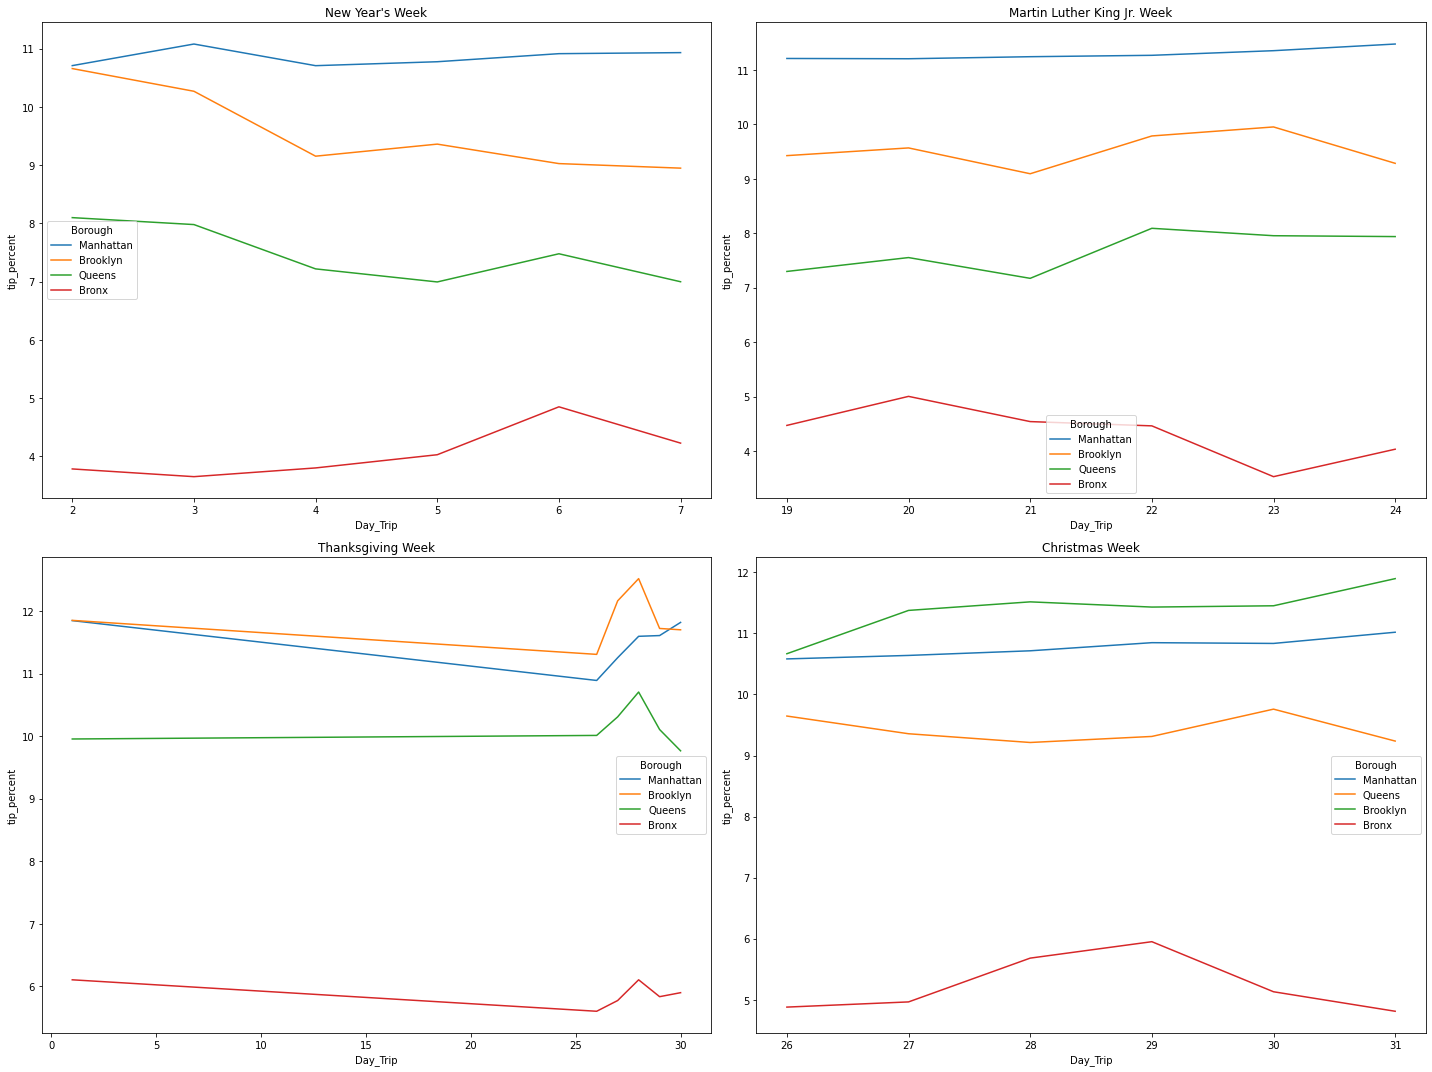

In [130]:
# Observing for each weekday
f, axes = plt.subplots(2,2, figsize=(20, 15))

sns.lineplot(data=Borough_data[Borough_data['Holiday'] == "New Year's Week"], x="Day_Trip", y="tip_percent" ,hue="Borough",ci=None, ax=axes[0,0]).set_title("New Year's Week")
sns.lineplot(data=Borough_data[Borough_data['Holiday'] == 'Martin Luther King Jr. Week'], x="Day_Trip", y="tip_percent" ,hue="Borough", ci=None,ax=axes[0,1]).set_title('Martin Luther King Jr. Week')

sns.lineplot(data=Borough_data[Borough_data['Holiday'] == 'ThanksgivingWeek'], x="Day_Trip", y="tip_percent" ,hue="Borough", ci=None,ax=axes[1,0]).set_title('Thanksgiving Week')
sns.lineplot(data=Borough_data[Borough_data['Holiday'] == 'Christmas Week'], x="Day_Trip", y="tip_percent" ,hue="Borough", ci=None,ax=axes[1,1]).set_title('Christmas Week')
plt.tight_layout()
plt.show() 


On New Years week, rides in Manhattan matain an average of 11% tip per day while rides in Bronx maintain about 4.5% tip per day . In Staten Island on first day average tip is anout 6.7% while on the last day of the week tips amount rallies to about 9.5%. Furthermore in Brooklyn and Queens the first day of New year has an average tip of 8% and 10.8% respectivley then the amount of tips per day on average decrease gradually until the last day of the week to reach an average tip of 7% and 9% reepctivley .

On MLK week, all boroughs have a strady trend except staten island . On average they mainatian an average tips of 11%, 9%, 7% and 4% respectivley for Manhattan, Nrooklyn, Queens and Bronx. While in staten island each of the 3rd and 5th days passangers tip on average of 3% and 7%.

On Thanksgiving week, all broughs maintain a similar trend. For Bronx, Queens ,Brooklyn and Manhattan they all start at an average value of 6%,10%,12%,12% increase to 6.3%, 10.3%, 13% and 12.5% on the third day and then they disperse going to the seventh day. On the seventh day,  Bronx average tip value returns to 6% , meanwhile Queens and Brroklyn average tip values drop to 9.8% and 11.8% respectivley. But in manhattan average tip increases from about 11% to 12%.

On Christmas week, For Bronx, Queens, Brooklyn they all maintain an average tip values of 5%, 9.5%, 10.9% and along the whole week, meanwhile in Manhattan the first day average tip is about 10.5% meanwhile lastr day is about 12%.